1. Importar el conjunto de datos: Lo primero que se debe hacer es cargar el conjunto de datos. Los datos pueden estar en diferentes formatos como CSV, Excel, JSON, etc.

In [ ]:
import pandas as pd
# Cargar el archivo CSV en un DataFrame
df = pd.read_excel('DATA_CLIMA.xls')
# Ver las primeras filas
df.head()

,Estación,Provincia,Temperatura máxima (ºC),Temperatura mínima (ºC),Temperatura media (ºC),Racha (km/h),Velocidad máxima (km/h),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm)
0,Estaca de Bares,A Coruña,13.3 (10:20),7.3 (23:30),10.3,121 (00:10),89 (00:10),5.2,2.8,0.0,0.2,2.2
1,As Pontes,A Coruña,11.6 (07:00),6.0 (23:30),8.8,NaN,NaN,48.6,24.2,16.0,5.8,2.6
2,A Coruña,A Coruña,13.7 (10:30),8.9 (22:00),11.3,67 (05:30),37 (05:30),17.2,6.0,9.2,0.6,1.4
3,A Coruña Aeropuerto,A Coruña,14.1 (11:30),7.9 (23:00),11.0,54 (00:10),30 (00:10),11.4,6.8,1.6,0.7,2.3
4,"Carballo, Depuradora",A Coruña,13.3 (11:20),7.6 (22:50),10.5,NaN,NaN,19.8,13.0,5.4,0.4,1.0


*Exploración inicial del conjunto de datos:* Antes de empezar con la limpieza, es importante inspeccionar los datos para entender su estructura y contenido.

*Dimensiones del conjunto de datos:*

In [ ]:
df.shape

(797, 12)

*Descripción de las columnas:*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Estación                   797 non-null    object 
 1   Provincia                  797 non-null    object 
 2   Temperatura máxima (ºC)    769 non-null    object 
 3   Temperatura mínima (ºC)    769 non-null    object 
 4   Temperatura media (ºC)     769 non-null    float64
 5   Racha (km/h)               650 non-null    object 
 6   Velocidad máxima (km/h)    653 non-null    object 
 7   Precipitación 00-24h (mm)  758 non-null    float64
 8   Precipitación 00-06h (mm)  761 non-null    float64
 9   Precipitación 06-12h (mm)  762 non-null    float64
 10  Precipitación 12-18h (mm)  764 non-null    float64
 11  Precipitación 18-24h (mm)  762 non-null    float64
dtypes: float64(6), object(6)
memory usage: 74.8+ KB


*Estadísticas descriptivas:*

In [ ]:
df.describe()  # Estadísticas como media, desviación estándar, mínimos y máximos

,Temperatura media (ºC),Precipitación 00-24h (mm),Precipitación 00-06h (mm),Precipitación 06-12h (mm),Precipitación 12-18h (mm),Precipitación 18-24h (mm)
count,769.000000,758.000000,761.000000,762.000000,764.000000,762.000000
mean,10.441612,9.384828,2.973982,1.813648,1.411257,3.151050
std,3.769043,15.125739,5.606085,3.889367,3.410692,6.345245
min,-0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.300000,3.000000,0.600000,0.200000,0.000000,0.300000
75%,13.000000,11.800000,3.700000,1.800000,0.800000,3.375000
max,19.500000,132.800000,47.600000,36.400000,27.600000,41.300000


**LIMPIEZA DE LOS DATOS**

**Limpieza de datos**

Una parte importante del proceso de obtención de datos es limpiar su contenido para que sea adecuado a nuestras necesidades y para hacerlos mas cómodos de usar.

Podemos empezar renombrando las columnas para que sea mas sencillo usarlas y ocupen menos espacio en pantalla

In [ ]:
df=df.rename(columns={'Estación': 'estacion','Provincia':'provincia','Temperatura máxima (ºC)':'temp_max','Temperatura mínima (ºC)':'temp_min','Temperatura media (ºC)':'temp_med','Racha (km/h)':'viento_racha','Velocidad máxima (km/h)':'viento_vel_max','Precipitación 00-24h (mm)':'prec_dia','Precipitación 00-06h (mm)':'prec_0_6h','Precipitación 06-12h (mm)':'prec_6_12h','Precipitación 12-18h (mm)':'prec_12_18h','Precipitación 18-24h (mm)':'prec_18_24h','source_file':'fecha'})
df.head(1)

,estacion,provincia,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h
0,Estaca de Bares,A Coruña,13.3 (10:20),7.3 (23:30),10.3,121 (00:10),89 (00:10),5.2,2.8,0.0,0.2,2.2


Podemos observar que en algunas columnas ademas del valor numérico también se tiene la hora, lo cual no nos interesa ya que los datos tienen que ser numéricos para nuestro análisis.

In [ ]:
df=df.replace(to_replace=r'.\(.+\)$', value='', regex=True)
df.head(1)

,estacion,provincia,temp_max,temp_min,temp_med,viento_racha,viento_vel_max,prec_dia,prec_0_6h,prec_6_12h,prec_12_18h,prec_18_24h
0,Estaca de Bares,A Coruña,13.3,7.3,10.3,121,89,5.2,2.8,0.0,0.2,2.2


Identificación de valores nulos: Muchas veces los conjuntos de datos contienen valores faltantes (nulos), que deben ser gestionados adecuadamente.

Identificar cuántos valores nulos existen en cada columna:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   estacion        797 non-null    object 
 1   provincia       797 non-null    object 
 2   temp_max        769 non-null    object 
 3   temp_min        769 non-null    object 
 4   temp_med        769 non-null    float64
 5   viento_racha    650 non-null    object 
 6   viento_vel_max  653 non-null    object 
 7   prec_dia        758 non-null    float64
 8   prec_0_6h       761 non-null    float64
 9   prec_6_12h      762 non-null    float64
 10  prec_12_18h     764 non-null    float64
 11  prec_18_24h     762 non-null    float64
dtypes: float64(6), object(6)
memory usage: 74.8+ KB


In [ ]:
df.isnull().sum()

,0
estacion,0
provincia,0
temp_max,28
temp_min,28
temp_med,28
viento_racha,147
viento_vel_max,144
prec_dia,39
prec_0_6h,36
prec_6_12h,35


In [ ]:
df_clean = df.dropna()  # Eliminar todas las filas con valores nulos

In [ ]:
# Convert 'temp_max' column to numeric, handling errors
df['temp_max'] = pd.to_numeric(df['temp_max'], errors='coerce')

# Replace NaN values with the mean of the numeric values in 'temp_max'
df['temp_max'] = df['temp_max'].fillna(df['temp_max'].mean())  # Reemplazar por la media

In [ ]:
df.isnull().sum()

,0
estacion,0
provincia,0
temp_max,0
temp_min,28
temp_med,28
viento_racha,147
viento_vel_max,144
prec_dia,39
prec_0_6h,36
prec_6_12h,35


**OTRAS TECNICAS DE LIMPIEZA**

Eliminación de duplicados: En ocasiones, los conjuntos de datos contienen filas duplicadas que deben eliminarse para evitar sesgos en el análisis.

In [ ]:
df_clean = df.drop_duplicates()  # Eliminar filas duplicadas

Conversión de tipos de datos: Algunas columnas pueden tener tipos de datos incorrectos, como fechas almacenadas como texto o números almacenados como cadenas. Es importante corregir estos tipos.

In [ ]:
df['columna'] = pd.to_numeric(df['columna'], errors='coerce')#Convertir una columna a tipo numérico:

In [ ]:
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')#Convertir una columna a formato de fecha:

Normalización de los datos: En muchos casos, las variables pueden tener diferentes escalas (por ejemplo, ingresos en miles y edad en años), lo que puede afectar a los modelos de Machine Learning. La normalización o estandarización ayuda a que todas las variables estén en una misma escala.

In [ ]:
#Estandarización (media = 0, desviación estándar = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['columna1', 'columna2']] = scaler.fit_transform(df[['columna1', 'columna2']])

In [ ]:
#Normalización (valores entre 0 y 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['columna1', 'columna2']] = scaler.fit_transform(df[['columna1', 'columna2']])

Detección y manejo de outliers (valores atípicos): Los outliers son valores que se encuentran muy lejos de otros puntos de datos. Pueden ser errores de entrada o puntos de datos importantes, por lo que es crucial identificarlos.

In [ ]:
#Gráficamente, se pueden identificar utilizando gráficos de caja o histogramas.
import seaborn as sns
sns.boxplot(x=df['columna'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='temp_max'>

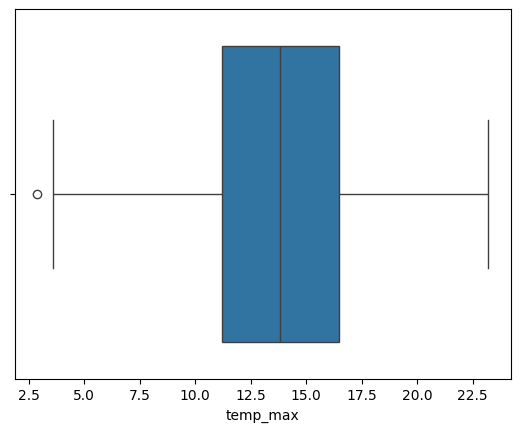

In [ ]:
import seaborn as sns
sns.boxplot(x=df['temp_max'])

Manejo de outliers:

In [ ]:
#Eliminación de outliers:
Q1 = df['columna'].quantile(0.25)
Q3 = df['columna'].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df['columna'] < (Q1 - 1.5 * IQR)) | (df['columna'] > (Q3 + 1.5 * IQR)))]

Codificación de variables categóricas: Los algoritmos de Machine Learning generalmente no pueden trabajar con datos categóricos (texto) directamente, por lo que estas variables deben ser codificadas en números.

In [ ]:
#One-hot encoding (Codificación de variables categóricas en varias columnas)
df_encoded = pd.get_dummies(df, columns=['columna_categorica'])

In [ ]:
#Label encoding (Asignar un número a cada categoría)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['columna_categorica'] = le.fit_transform(df['columna_categorica'])